In [1]:
from scipy import io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from SparseCoefRecovery import *
import time
from sklearn.manifold.spectral_embedding_ import spectral_embedding
from sklearn.cluster.k_means_ import k_means

In [2]:
#load data first
#data = io.loadmat('DBA_segmented_data_subset.mat')
data = io.loadmat('C57_segmented_data.mat')
X = data ['inlier_newV']
#data = io.loadmat('DBA_all_RUs.mat')
#data = io.loadmat('DBA_clean.mat')
#X = data['V']
X = X/np.linalg.norm(X,ord=2,axis=0)
nb_of_syllables = X.shape[1] 

In [5]:
#begin cosine similarity + spetral clustering

In [3]:
#CKSym = X.T@X

In [4]:
#CKSym = CKSym-np.diag(np.diag(CKSym))

In [18]:
#CKSym[30,30]

In [10]:
#set the number of clusters
#K = 40

In [5]:
#Embed = spectral_embedding(CKSym, n_components=60, eigen_solver=None,
#                       random_state=None, eigen_tol=0.0,
#                       norm_laplacian=True, drop_first=False)

#normalize embedding to unit vector
#Embed = Embed/np.linalg.norm(Embed,ord=2,axis=0)

In [6]:
# do k-means with embedding
#_, labels, _ = k_means(Embed[:,:60], n_clusters=60, n_init=10)

In [2]:
#investigate the number of each cluster
#labelsum = np.zeros(60)
#for i in range(60):
#    labelsum[i] = np.sum(labels==i)
#print(np.sort(labelsum))

In [8]:
#save labels
#file = 'DBA_subset_label_clean_cosine_60.mat'
#label = {}
#label['label'] = labels+1
#label['inliers'] = np.ones(nb_of_syllables)
#io.savemat(file,label)

In [15]:
#visualization
#Y_sne = TSNE(n_components = 2).fit_transform(Embed[:,:40])

In [1]:
#plt.figure(figsize=(10,10))
#plt.scatter(Y_sne[:, 0], Y_sne[:, 1],s = 10, c = labels,cmap=plt.cm.Spectral)
#plt.show()

In [ ]:
#finish cosine similarity + spetral clustering

In [ ]:
#begin sparse subsapce clustering

In [3]:
#check the size of dataset
#each data per column
print(X.shape)

(4096, 7751)


In [4]:
#set hyperparameter
lmbda = 0.3  #1/np.sqrt(100) cst=0

In [5]:
#because of using lasso package
#do not need to run this line if you do not use lasso package in sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
lmbda = lmbda/(X.shape[0]-1)

In [6]:
#sparse representation 
print('begin representation')
CMat = SparseCoefRecovery(X, Opt='Lasso', lmbda=lmbda)
#CMat = SparseCoefRecovery(X, Opt='omp', lmbda=lmbda)
print('finish representation')

begin representation
opt Lasso
0 0.00045228004455566406
1 0.7252292633056641
2 1.3313584327697754
3 2.0483479499816895
4 3.0225565433502197
5 3.9761300086975098
6 6.104919195175171
7 7.0015480518341064
8 8.709877252578735
9 9.200385332107544
10 9.775400400161743
11 11.468926906585693
12 13.607640266418457
13 14.02150297164917
14 14.824216365814209
15 15.940240383148193
16 16.739344835281372
17 17.15759825706482
18 17.694783687591553
19 17.981342554092407
20 18.437171936035156
21 19.12540555000305
22 19.619420766830444
23 20.03455662727356
24 20.41587495803833
25 21.262192726135254
26 21.81210684776306
27 22.959238529205322
28 23.50914168357849
29 24.302395820617676
30 25.60526728630066
31 26.385444164276123
32 26.797506093978882
33 27.434995889663696
34 28.162068367004395
35 28.705715894699097
36 29.21276044845581
37 29.67867350578308
38 30.16969108581543
39 31.045586824417114
40 32.10606598854065
41 32.64967942237854
42 33.90311074256897
43 35.03516149520874
44 35.68639397621155
45 36

368 303.9991240501404
369 306.3074119091034
370 307.26901626586914
371 308.2080521583557
372 308.95352578163147
373 309.55882120132446
374 310.4488618373871
375 311.09452629089355
376 311.69638228416443
377 312.38685846328735
378 314.0414686203003
379 315.75738644599915
380 317.075067281723
381 317.75465202331543
382 318.5801203250885
383 320.56773567199707
384 321.6496195793152
385 322.22755455970764
386 323.7470746040344
387 325.3940885066986
388 326.1667699813843
389 327.15201592445374
390 328.01317620277405
391 328.65323781967163
392 330.2220826148987
393 330.89884305000305
394 332.79917192459106
395 333.57452750205994
396 334.54446721076965
397 335.8433003425598
398 336.511513710022
399 337.883260011673
400 339.47752356529236
401 340.9623067378998
402 343.30447483062744
403 344.40276193618774
404 345.1497046947479
405 349.8678753376007
406 350.3149263858795
407 351.2067632675171
408 352.48951959609985
409 353.68228363990784
410 355.17786169052124
411 355.72475719451904
412 356.357

738 705.4811451435089
739 706.8892869949341
740 707.7944045066833
741 711.9667694568634
742 712.4292402267456
743 713.4220798015594
744 713.8707118034363
745 714.7863249778748
746 715.8504984378815
747 716.3048415184021
748 717.6598315238953
749 718.2514791488647
750 718.7189345359802
751 719.3598530292511
752 721.2200334072113
753 721.7870516777039
754 722.6604287624359
755 723.0930466651917
756 723.4919855594635
757 724.5026617050171
758 725.0940937995911
759 725.6339859962463
760 726.6006693840027
761 727.4969325065613
762 728.3437716960907
763 728.7455947399139
764 729.2228140830994
765 729.966183423996
766 730.7053546905518
767 731.651953458786
768 732.4491093158722
769 732.8668885231018
770 733.8504419326782
771 734.9304802417755
772 736.3398158550262
773 736.6532800197601
774 737.2424008846283
775 738.012523651123
776 738.9481861591339
777 739.8693549633026
778 740.6387655735016
779 741.5834953784943
780 742.1279530525208
781 742.8501236438751
782 743.3590128421783
783 744.50593

1107 1015.414877653122
1108 1015.746420621872
1109 1017.4982249736786
1110 1018.181943655014
1111 1018.8603932857513
1112 1019.4570984840393
1113 1020.9800662994385
1114 1021.9367537498474
1115 1022.4933152198792
1116 1023.24933552742
1117 1023.9915580749512
1118 1025.0249722003937
1119 1025.6493592262268
1120 1026.1567442417145
1121 1026.74267411232
1122 1027.579885005951
1123 1028.514347076416
1124 1029.8341310024261
1125 1030.5898122787476
1126 1031.2679166793823
1127 1031.8992278575897
1128 1032.928857088089
1129 1034.461538553238
1130 1035.3417460918427
1131 1035.9005651474
1132 1036.434722661972
1133 1037.2728292942047
1134 1037.6857998371124
1135 1038.4619829654694
1136 1039.233139038086
1137 1039.5850212574005
1138 1040.3584508895874
1139 1041.11545920372
1140 1042.7270352840424
1141 1043.6581408977509
1142 1044.4107706546783
1143 1045.2054266929626
1144 1045.8482913970947
1145 1046.527839899063
1146 1047.3213164806366
1147 1048.1148443222046
1148 1049.9063873291016
1149 1053.5

1453 1302.9768874645233
1454 1304.218109369278
1455 1305.123728275299
1456 1305.6346321105957
1457 1306.0843577384949
1458 1306.7395284175873
1459 1307.940036058426
1460 1308.561365365982
1461 1310.50266122818
1462 1311.9660470485687
1463 1313.6757481098175
1464 1314.3144598007202
1465 1315.403819322586
1466 1318.1077649593353
1467 1318.3654091358185
1468 1318.9844453334808
1469 1320.9816472530365
1470 1322.0748836994171
1471 1323.3817982673645
1472 1325.476454257965
1473 1326.3463294506073
1474 1326.8542137145996
1475 1327.607239484787
1476 1329.9982957839966
1477 1330.9304234981537
1478 1331.6429660320282
1479 1332.029619216919
1480 1332.4758882522583
1481 1333.7102189064026
1482 1334.2995254993439
1483 1334.6693940162659
1484 1336.3588824272156
1485 1337.0182032585144
1486 1337.7447328567505
1487 1338.8304252624512
1488 1339.183396100998
1489 1339.9032440185547
1490 1340.644680261612
1491 1341.2075502872467
1492 1341.585437297821
1493 1342.2679953575134
1494 1343.662627696991
1495 1

1799 1688.4857215881348
1800 1689.1834073066711
1801 1689.939560174942
1802 1691.6610922813416
1803 1692.1985847949982
1804 1692.8759257793427
1805 1695.9869816303253
1806 1696.7956538200378
1807 1697.4743270874023
1808 1697.9069192409515
1809 1699.1039299964905
1810 1699.9053926467896
1811 1700.9922559261322
1812 1701.3528995513916
1813 1702.905733346939
1814 1705.1290106773376
1815 1706.97655916214
1816 1707.813588142395
1817 1709.043327331543
1818 1710.7482326030731
1819 1712.6795070171356
1820 1715.735422372818
1821 1716.6179926395416
1822 1718.3141586780548
1823 1720.014466047287
1824 1720.6333501338959
1825 1721.242746591568
1826 1722.1012105941772
1827 1722.816719532013
1828 1723.8729982376099
1829 1724.8387598991394
1830 1725.4130136966705
1831 1726.3465967178345
1832 1726.7949514389038
1833 1727.4544999599457
1834 1728.94584274292
1835 1729.5923342704773
1836 1730.1850891113281
1837 1731.0288906097412
1838 1732.1128425598145
1839 1732.7510914802551
1840 1733.1132130622864
1841

2144 2044.008206129074
2145 2045.3621609210968
2146 2046.1217098236084
2147 2047.7452955245972
2148 2048.429511785507
2149 2049.2595744132996
2150 2050.4987757205963
2151 2051.8820943832397
2152 2052.88809800148
2153 2053.54087638855
2154 2054.0301864147186
2155 2054.5887026786804
2156 2055.0453567504883
2157 2055.4450504779816
2158 2056.1228959560394
2159 2056.881634950638
2160 2057.2689337730408
2161 2057.7872450351715
2162 2059.622022151947
2163 2062.4073741436005
2164 2063.351560115814
2165 2064.368725299835
2166 2064.5964715480804
2167 2065.967351436615
2168 2066.9568972587585
2169 2067.732382774353
2170 2068.4140055179596
2171 2069.6119101047516
2172 2070.105350255966
2173 2071.257990837097
2174 2071.8171560764313
2175 2072.303521156311
2176 2072.8903295993805
2177 2073.6585268974304
2178 2073.97789144516
2179 2075.219489097595
2180 2076.0791454315186
2181 2076.8911621570587
2182 2077.957572221756
2183 2078.6153955459595
2184 2079.7001917362213
2185 2080.2651286125183
2186 2080.5

2493 2437.341949701309
2494 2438.143222093582
2495 2439.037032842636
2496 2439.4500200748444
2497 2441.7106115818024
2498 2444.706281900406
2499 2446.053320169449
2500 2446.860388278961
2501 2448.161167383194
2502 2449.0037088394165
2503 2450.016210794449
2504 2450.3330023288727
2505 2450.9071605205536
2506 2451.5544307231903
2507 2452.5879521369934
2508 2453.6320238113403
2509 2454.4757556915283
2510 2457.566610813141
2511 2458.5646255016327
2512 2460.2552177906036
2513 2464.256665468216
2514 2465.8824422359467
2515 2466.3521757125854
2516 2466.914693593979
2517 2468.169802904129
2518 2470.0574791431427
2519 2470.955218553543
2520 2473.526958465576
2521 2474.7009806632996
2522 2476.4515702724457
2523 2478.742573261261
2524 2479.318170070648
2525 2479.6981344223022
2526 2481.114364385605
2527 2482.6159987449646
2528 2483.6159443855286
2529 2484.10826253891
2530 2484.4796164035797
2531 2485.419671535492
2532 2486.289757490158
2533 2486.994987010956
2534 2487.9109222888947
2535 2488.1304

2842 2725.59893655777
2843 2726.595634698868
2844 2727.130291700363
2845 2727.7773044109344
2846 2728.1715166568756
2847 2728.6553502082825
2848 2729.857013463974
2849 2730.802880525589
2850 2731.8103733062744
2851 2732.3220806121826
2852 2732.6700489521027
2853 2733.1144285202026
2854 2733.4640550613403
2855 2733.721030473709
2856 2734.593305826187
2857 2735.038681268692
2858 2735.4083099365234
2859 2736.7788169384003
2860 2737.358986377716
2861 2737.8921382427216
2862 2740.389927625656
2863 2742.394059419632
2864 2743.4535653591156
2865 2743.9612634181976
2866 2744.5949318408966
2867 2745.190102338791
2868 2746.6995265483856
2869 2747.1820459365845
2870 2747.7688930034637
2871 2748.4463844299316
2872 2750.4851837158203
2873 2751.0321929454803
2874 2751.494472503662
2875 2751.953372001648
2876 2752.96630859375
2877 2753.6118392944336
2878 2754.130640029907
2879 2755.038024663925
2880 2755.494293689728
2881 2756.6239051818848
2882 2757.548841714859
2883 2758.190237760544
2884 2759.2195

3191 2990.23091006279
3192 2991.4479625225067
3193 2991.962226629257
3194 2993.725207090378
3195 2994.1708562374115
3196 2995.021386861801
3197 2996.313733100891
3198 2997.017799139023
3199 2997.460253715515
3200 2998.042595386505
3201 2998.7563796043396
3202 2999.36518406868
3203 3000.0122509002686
3204 3000.517655134201
3205 3001.7929632663727
3206 3002.4778048992157
3207 3004.718822479248
3208 3005.7806589603424
3209 3006.5123279094696
3210 3006.984528541565
3211 3007.495269536972
3212 3007.786228656769
3213 3008.2056143283844
3214 3008.8028440475464
3215 3009.5226101875305
3216 3010.270710706711
3217 3012.207815170288
3218 3013.039050102234
3219 3013.604680776596
3220 3014.0324721336365
3221 3014.810793876648
3222 3015.126023054123
3223 3015.884717941284
3224 3017.0115909576416
3225 3017.7259480953217
3226 3018.594224691391
3227 3019.482131958008
3228 3020.68110370636
3229 3022.0114736557007
3230 3023.0132026672363
3231 3023.2442405223846
3232 3023.7011098861694
3233 3024.424563407

3539 3301.095880508423
3540 3301.676689386368
3541 3302.617835521698
3542 3303.2325887680054
3543 3305.479969024658
3544 3305.781281232834
3545 3306.893780708313
3546 3307.835613965988
3547 3308.4148960113525
3548 3308.893377304077
3549 3309.5439813137054
3550 3310.0940506458282
3551 3310.6847627162933
3552 3311.1452174186707
3553 3311.7251930236816
3554 3312.297773361206
3555 3312.7045497894287
3556 3313.3071756362915
3557 3314.062201976776
3558 3314.4187099933624
3559 3315.2155725955963
3560 3315.6605730056763
3561 3316.2272918224335
3562 3316.6944591999054
3563 3317.1196184158325
3564 3317.9543147087097
3565 3318.532148838043
3566 3319.003618478775
3567 3320.472094774246
3568 3321.463303565979
3569 3321.903491258621
3570 3322.2675790786743
3571 3322.6464953422546
3572 3323.3109731674194
3573 3323.7636857032776
3574 3324.8737177848816
3575 3325.406881093979
3576 3325.901589870453
3577 3326.988767147064
3578 3327.856620788574
3579 3328.271200656891
3580 3329.504147529602
3581 3330.148

3889 3580.0194396972656
3890 3580.719835281372
3891 3581.931747674942
3892 3582.475758075714
3893 3582.9437034130096
3894 3583.2976229190826
3895 3583.84348654747
3896 3584.313779592514
3897 3584.782313346863
3898 3585.245639562607
3899 3585.6284959316254
3900 3586.3580980300903
3901 3587.5317993164062
3902 3588.0275888442993
3903 3588.2613365650177
3904 3589.1336426734924
3905 3589.8881497383118
3906 3591.1803493499756
3907 3591.637917995453
3908 3592.4587891101837
3909 3593.1558768749237
3910 3593.607935667038
3911 3596.362378358841
3912 3597.400009393692
3913 3598.092185020447
3914 3598.9085898399353
3915 3599.464474439621
3916 3600.1230733394623
3917 3600.5375928878784
3918 3601.1643624305725
3919 3601.6932830810547
3920 3602.1327362060547
3921 3602.6162564754486
3922 3603.2402424812317
3923 3604.270584821701
3924 3605.210026741028
3925 3605.64062333107
3926 3606.337736606598
3927 3606.945212364197
3928 3609.135151863098
3929 3610.0954575538635
3930 3610.9479043483734
3931 3613.255

4239 3875.176413297653
4240 3875.6551570892334
4241 3876.167637825012
4242 3876.79039978981
4243 3877.306162595749
4244 3877.768427848816
4245 3878.866282939911
4246 3879.4701793193817
4247 3881.8975105285645
4248 3883.3031392097473
4249 3884.185196876526
4250 3884.8692746162415
4251 3886.2581758499146
4252 3887.101732492447
4253 3887.6316225528717
4254 3888.25666475296
4255 3889.825430870056
4256 3890.490135192871
4257 3891.3619446754456
4258 3892.738806247711
4259 3895.0552768707275
4260 3896.0469558238983
4261 3897.4371523857117
4262 3898.1551604270935
4263 3898.9313745498657
4264 3899.411107301712
4265 3900.993407726288
4266 3901.3953845500946
4267 3902.656673192978
4268 3903.4027943611145
4269 3904.692136287689
4270 3905.627747774124
4271 3906.7123835086823
4272 3908.221422433853
4273 3909.066613674164
4274 3909.499436855316
4275 3909.8735778331757
4276 3911.0349979400635
4277 3911.42516541481
4278 3913.396767139435
4279 3914.5958337783813
4280 3915.029374361038
4281 3916.08289337

4591 4216.710596561432
4592 4217.1545696258545
4593 4217.783951044083
4594 4218.699589252472
4595 4219.113797903061
4596 4219.755158901215
4597 4220.398250579834
4598 4222.020407915115
4599 4222.506989002228
4600 4224.0081288814545
4601 4225.6786296367645
4602 4226.370788097382
4603 4226.904692173004
4604 4227.468799829483
4605 4228.333956718445
4606 4228.8806800842285
4607 4229.33367061615
4608 4229.802012681961
4609 4230.326637029648
4610 4230.811322927475
4611 4231.529529809952
4612 4232.349597930908
4613 4233.139530420303
4614 4233.526925563812
4615 4234.413194894791
4616 4237.732187271118
4617 4238.621562242508
4618 4239.411502838135
4619 4240.084895372391
4620 4240.614544630051
4621 4241.317116737366
4622 4241.927768707275
4623 4242.653611660004
4624 4242.998778343201
4625 4243.777394771576
4626 4244.258192539215
4627 4244.787167310715
4628 4245.395783424377
4629 4246.061141014099
4630 4246.64860534668
4631 4247.17197227478
4632 4247.684720993042
4633 4248.34979391098
4634 4248.9

4948 4526.181521892548
4949 4527.466451883316
4950 4528.180010795593
4951 4528.610576868057
4952 4529.21599316597
4953 4529.587877035141
4954 4530.097830295563
4955 4532.972651004791
4956 4533.624935388565
4957 4536.429385185242
4958 4538.018907785416
4959 4539.639745473862
4960 4541.080407857895
4961 4541.7112028598785
4962 4542.497771024704
4963 4543.079397439957
4964 4544.237043619156
4965 4545.102672338486
4966 4545.560380935669
4967 4546.196220874786
4968 4547.216268539429
4969 4547.728761434555
4970 4548.203401088715
4971 4549.1060354709625
4972 4549.796387195587
4973 4551.173176527023
4974 4553.992002487183
4975 4555.8413672447205
4976 4556.529083490372
4977 4557.843995809555
4978 4558.433131694794
4979 4559.146398305893
4980 4559.93576002121
4981 4560.3162887096405
4982 4561.10348534584
4983 4562.036773443222
4984 4562.5551841259
4985 4563.885154008865
4986 4564.763624191284
4987 4565.270898103714
4988 4565.831632852554
4989 4567.825964927673
4990 4571.2320125103
4991 4572.1684

5305 4897.304037570953
5306 4898.872394323349
5307 4900.004423618317
5308 4901.832566976547
5309 4902.768575668335
5310 4903.47714304924
5311 4906.043756484985
5312 4906.609438419342
5313 4907.0869472026825
5314 4908.904097795486
5315 4910.89693570137
5316 4911.549702167511
5317 4914.827658176422
5318 4916.283081531525
5319 4916.922119140625
5320 4917.7175080776215
5321 4918.426021814346
5322 4919.461502313614
5323 4920.047106742859
5324 4921.136573314667
5325 4922.217209339142
5326 4923.550365447998
5327 4924.174064874649
5328 4924.7002511024475
5329 4925.832733154297
5330 4926.640351295471
5331 4927.42985868454
5332 4929.191366195679
5333 4929.636163711548
5334 4930.865510702133
5335 4931.800310850143
5336 4933.615310430527
5337 4934.338275909424
5338 4935.431201934814
5339 4936.668729543686
5340 4937.13728928566
5341 4937.606541156769
5342 4938.439935922623
5343 4939.191870689392
5344 4939.6844120025635
5345 4940.126319408417
5346 4941.233204603195
5347 4942.164566040039
5348 4943.1

5662 5296.128051280975
5663 5296.636924743652
5664 5299.0728058815
5665 5299.9674599170685
5666 5300.643699645996
5667 5302.493976593018
5668 5303.36358833313
5669 5304.289539813995
5670 5304.956874370575
5671 5305.768614053726
5672 5306.860621213913
5673 5308.575560808182
5674 5309.827565193176
5675 5313.0617072582245
5676 5313.708833217621
5677 5315.177728652954
5678 5315.933161735535
5679 5316.672557115555
5680 5318.914019346237
5681 5321.556151628494
5682 5322.784582853317
5683 5323.723834037781
5684 5325.262341499329
5685 5325.83877491951
5686 5326.183162927628
5687 5328.640780210495
5688 5329.805295944214
5689 5330.622607946396
5690 5331.12505030632
5691 5331.583243131638
5692 5332.004459619522
5693 5332.503538131714
5694 5333.044275760651
5695 5333.3893394470215
5696 5333.877726793289
5697 5334.776327133179
5698 5335.362324476242
5699 5337.199011564255
5700 5340.048660039902
5701 5340.963951349258
5702 5341.435144662857
5703 5342.1162576675415
5704 5343.522516489029
5705 5344.30

6019 5680.2086708545685
6020 5680.7742602825165
6021 5681.336349248886
6022 5681.951136350632
6023 5682.639578819275
6024 5683.482527732849
6025 5684.2192714214325
6026 5684.689387798309
6027 5685.320506095886
6028 5686.276372432709
6029 5687.151735305786
6030 5687.7545330524445
6031 5689.168963193893
6032 5690.066470384598
6033 5690.794595718384
6034 5692.792040586472
6035 5693.789489269257
6036 5694.497129678726
6037 5695.416320562363
6038 5695.965286016464
6039 5696.330508708954
6040 5696.877930879593
6041 5697.221190214157
6042 5697.660693407059
6043 5698.849490880966
6044 5700.486548900604
6045 5701.848876953125
6046 5702.785233974457
6047 5704.870201826096
6048 5706.151906490326
6049 5706.985080957413
6050 5707.525743722916
6051 5709.346740484238
6052 5710.272639036179
6053 5711.167888402939
6054 5713.5472140312195
6055 5715.494792938232
6056 5716.665960073471
6057 5717.829573631287
6058 5718.359131097794
6059 5719.225041627884
6060 5720.124879360199
6061 5720.547941207886
6062 5

6376 6016.7938487529755
6377 6017.387413978577
6378 6018.242451429367
6379 6019.08696603775
6380 6020.111223220825
6381 6021.466317653656
6382 6022.450316905975
6383 6023.205139160156
6384 6023.914051055908
6385 6026.176988840103
6386 6026.6659100055695
6387 6027.200806379318
6388 6028.049126625061
6389 6030.330704212189
6390 6030.943091630936
6391 6031.8379735946655
6392 6032.24199795723
6393 6033.127192258835
6394 6034.03547334671
6395 6035.330547809601
6396 6036.591946363449
6397 6037.49548125267
6398 6038.153208494186
6399 6038.667286396027
6400 6039.47412776947
6401 6040.008415460587
6402 6040.5184280872345
6403 6041.157926797867
6404 6041.74360871315
6405 6042.508260011673
6406 6043.399617433548
6407 6044.013271808624
6408 6045.535984754562
6409 6045.962543964386
6410 6047.612710475922
6411 6049.031866788864
6412 6049.519678354263
6413 6050.489585161209
6414 6051.048202753067
6415 6051.663590669632
6416 6052.094444274902
6417 6053.206768512726
6418 6053.969253063202
6419 6054.892

6733 6327.6102504730225
6734 6327.994301319122
6735 6329.009220600128
6736 6329.715336084366
6737 6330.580858469009
6738 6331.104978322983
6739 6331.592437982559
6740 6333.104737997055
6741 6333.709783792496
6742 6335.037616491318
6743 6336.18460392952
6744 6336.976897716522
6745 6338.547474145889
6746 6339.221959114075
6747 6339.697768211365
6748 6340.927417039871
6749 6341.443108320236
6750 6342.234884977341
6751 6342.862124919891
6752 6343.333960533142
6753 6343.875693321228
6754 6344.734172344208
6755 6345.502861261368
6756 6346.0864453315735
6757 6346.477376937866
6758 6347.0702447891235
6759 6347.733280420303
6760 6348.311178922653
6761 6348.682275295258
6762 6349.644196033478
6763 6350.230483531952
6764 6351.061076164246
6765 6351.806422948837
6766 6352.354450702667
6767 6352.707895278931
6768 6353.222213506699
6769 6355.822575807571
6770 6356.639452695847
6771 6357.301633358002
6772 6357.875313043594
6773 6359.060375452042
6774 6359.974975347519
6775 6360.743731737137
6776 6361

7090 6611.123654603958
7091 6611.530141830444
7092 6612.2218453884125
7093 6612.595691204071
7094 6613.484133243561
7095 6614.082023143768
7096 6614.905859708786
7097 6615.91067814827
7098 6616.683822154999
7099 6617.183940887451
7100 6617.8720853328705
7101 6618.413157701492
7102 6619.0036742687225
7103 6619.778813838959
7104 6621.035905838013
7105 6622.031165361404
7106 6622.706459283829
7107 6623.372911453247
7108 6624.26503443718
7109 6625.250507116318
7110 6625.939201593399
7111 6626.6303017139435
7112 6627.345391988754
7113 6628.137703180313
7114 6628.64834189415
7115 6629.42756652832
7116 6630.025604963303
7117 6630.612133741379
7118 6631.448247671127
7119 6632.9869039058685
7120 6634.376744508743
7121 6635.118987321854
7122 6635.795247554779
7123 6636.132683753967
7124 6636.756692171097
7125 6637.39524936676
7126 6637.718426942825
7127 6638.31490945816
7128 6638.685846090317
7129 6639.571351289749
7130 6640.599572181702
7131 6641.393670558929
7132 6642.531172990799
7133 6643.34

7447 6938.091731071472
7448 6938.602601051331
7449 6939.854682683945
7450 6941.357584476471
7451 6941.977016448975
7452 6942.493061065674
7453 6942.995156049728
7454 6943.743724107742
7455 6945.053765773773
7456 6945.533079624176
7457 6946.239770412445
7458 6946.724370241165
7459 6947.712048530579
7460 6948.2105622291565
7461 6949.251196146011
7462 6949.747186660767
7463 6950.21756529808
7464 6950.55509519577
7465 6951.311498165131
7466 6951.9998660087585
7467 6952.642081737518
7468 6953.675479888916
7469 6954.202846288681
7470 6954.632000684738
7471 6955.50711607933
7472 6956.159371614456
7473 6956.759443283081
7474 6957.286965847015
7475 6957.784673690796
7476 6958.533139705658
7477 6959.957950592041
7478 6960.522213935852
7479 6961.350566864014
7480 6961.983022451401
7481 6963.459502696991
7482 6965.074908018112
7483 6966.044738292694
7484 6967.025915384293
7485 6967.7736847400665
7486 6969.575271368027
7487 6970.61936545372
7488 6972.561450719833
7489 6974.229124069214
7490 6975.80

In [7]:
#you can save the coefficients here
file = 'C57_Coefficient_clean_SSC_40.mat'
data = {}
data['CMat'] = CMat
io.savemat(file,data)

#you can load the coefficients here
#file = 'C57_Coefficient_clean_oldV.mat'
#data = io.loadmat(file)
#CMat = data['CMat']

In [8]:
#check the result of sparse representation
thres = 0.001
count = np.zeros(CMat.shape[0])
count_zero = 0
CMat[CMat<0] = 0
temC = CMat+CMat.T
for i in range(CMat.shape[0]):
    count[i] = np.sum(temC[:,i]>thres)
    count_zero += count[i]<=0
print('the average #(nonzero coefficient)' , np.mean(count))
#the min and max
print(np.min(count),np.max(count))
#the number of data which can't be represented by other data points are also outliers
print(count_zero)

the average #(nonzero coefficient) 9.453231841052768
0.0 35.0
2


In [9]:
inliers = count>0.5
outliers = count<0.5

In [10]:
#extract the data which can be represented by other data points
CMat = CMat[inliers,:]
CMat = CMat[:,inliers]

In [11]:
#build adjacent matrix
CMat[CMat<0] = 0;
CKSym = np.abs(CMat)
CKSym = CKSym+CKSym.T
CKSym[CKSym<thres] = 0

In [12]:
#set the number of clusters
K = 40

In [13]:
# get embedding
Embed = spectral_embedding(CKSym, n_components=K, eigen_solver=None,
                       random_state=None, eigen_tol=0.0,
                       norm_laplacian=True, drop_first=False)

#normalize embedding to unit vector
Embed = Embed/np.linalg.norm(Embed,ord=2,axis=0)

/home/wangjx/.conda/envs/py36/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [14]:
# do k-means with embedding
_, labels, _ = k_means(Embed[:,:40], n_clusters=40, n_init=10)

In [15]:
#investigate the number of each cluster
labelsum = np.zeros(40)
for i in range(40):
    labelsum[i] = np.sum(labels==i)
print(np.sort(labelsum))

[  2.   2.   2.   2.   2.   2.   2.   3.   3.   5.   6.   6.  10.  11.
  12.  12.  22.  25.  62. 156. 163. 174. 186. 201. 224. 227. 230. 234.
 255. 319. 358. 363. 416. 434. 435. 508. 511. 539. 800. 825.]


In [16]:
#save labels
file = 'C57_label_clean_SSC_40.mat'
label = {}
label['label'] = labels+1
label['inliers'] = inliers
io.savemat(file,label)

In [17]:
#visualization
Y_sne = TSNE(n_components = 2).fit_transform(Embed[:,:40])

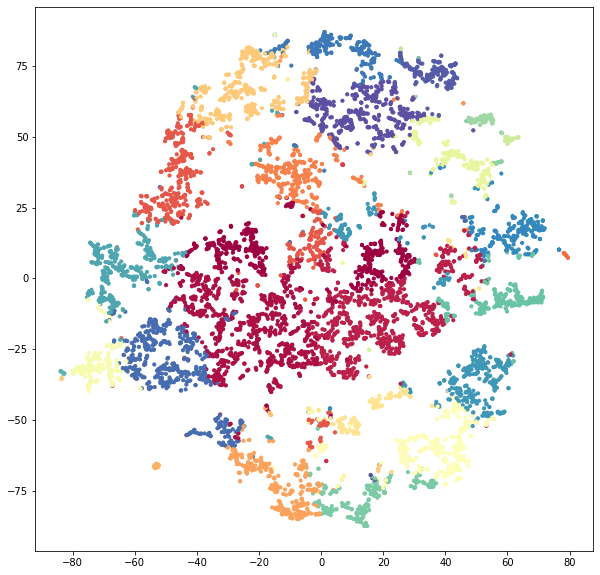

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(Y_sne[:, 0], Y_sne[:, 1],s = 10, c = labels,cmap=plt.cm.Spectral)
plt.show()

In [ ]:
#finish sparse subsapce clustering

In [ ]:
#begin kmeans

In [20]:
#_, labels_k, _ = k_means(X.T, n_clusters=60, n_init=10)

In [3]:
#labelsum = np.zeros(60)
#for i in range(60):
#    labelsum[i] = np.sum(labels_k==i)
#print(np.sort(labelsum))

In [22]:
#file = 'C57_label_clean_kmeans_40.mat'
#label = {}
#label['label'] = labels_k+1
#label['inliers'] = np.ones(nb_of_syllables)
#io.savemat(file,label)

In [ ]:
#dimension reduction(for visualizing the k-means result)
#a = PCA(n_components = 100)
#Y = a.fit_transform(X.T)
#Y = Y.T

In [15]:
#visualization
#Y_sne_k = TSNE(n_components = 2).fit_transform(Y.T)

In [4]:
#plt.figure(figsize=(10,10))
#plt.scatter(Y_sne_k[:, 0], Y_sne_k[:, 1],s = 10, c = labels_k,cmap=plt.cm.Spectral)
#plt.show()